# FIFA ANALYSIS


In [31]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale

In [32]:
# Create your connection.
cnx = sqlite3.connect('C:/Users/karaj/Downloads/soccer/database.sqlite')
df = pd.read_sql_query("SELECT * FROM Player_Attributes", cnx)

In [33]:
df.columns

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

In [34]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,183978.0,91989.500000,53110.018250,1.0,45995.25,91989.5,137983.75,183978.0
player_fifa_api_id,183978.0,165671.524291,53851.094769,2.0,155798.00,183488.0,199848.00,234141.0
player_api_id,183978.0,135900.617324,136927.840510,2625.0,34763.00,77741.0,191080.00,750584.0
overall_rating,183142.0,68.600015,7.041139,33.0,64.00,69.0,73.00,94.0
potential,183142.0,73.460353,6.592271,39.0,69.00,74.0,78.00,97.0
crossing,183142.0,55.086883,17.242135,1.0,45.00,59.0,68.00,95.0
finishing,183142.0,49.921078,19.038705,1.0,34.00,53.0,65.00,97.0
heading_accuracy,183142.0,57.266023,16.488905,1.0,49.00,60.0,68.00,98.0
short_passing,183142.0,62.429672,14.194068,3.0,57.00,65.0,72.00,97.0
volleys,181265.0,49.468436,18.256618,1.0,35.00,52.0,64.00,93.0


In [35]:
#is any row NULL ?
df.isnull().any().any(), df.shape

(True, (183978, 42))

In [36]:
df.isnull().any().any()

True

In [37]:
df.isnull().sum(axis=0)

id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle     

In [38]:
# Fix it

# Take initial # of rows
rows = df.shape[0]

# Drop the NULL rows
df = df.dropna()

In [39]:
#Check if all NULLS are gone ?
print(rows)
df.isnull().any().any(), df.shape

183978


(False, (180354, 42))

In [40]:
#How many rows with NULL values?

rows - df.shape[0]

3624

In [41]:
#Shuffle the rows of df so we get a distributed sample when we display top few rows

df = df.reindex(np.random.permutation(df.index))

In [42]:
df.head(5)

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
27077,27078,190799,51953,2012-08-31 00:00:00,74.0,80.0,right,medium,medium,59.0,...,78.0,42.0,36.0,46.0,45.0,8.0,15.0,6.0,8.0,12.0
149925,149926,204485,278343,2016-01-07 00:00:00,75.0,81.0,left,medium,medium,72.0,...,76.0,70.0,24.0,27.0,21.0,15.0,9.0,13.0,11.0,6.0
151988,151989,149231,27695,2014-09-18 00:00:00,71.0,71.0,right,medium,medium,65.0,...,75.0,69.0,57.0,68.0,69.0,7.0,12.0,7.0,7.0,6.0
49537,49538,179741,51409,2007-02-22 00:00:00,58.0,64.0,left,medium,medium,49.0,...,66.0,48.0,59.0,62.0,74.0,7.0,20.0,44.0,20.0,20.0
40080,40081,156745,160901,2012-08-31 00:00:00,54.0,63.0,right,medium,medium,19.0,...,12.0,24.0,11.0,10.0,18.0,51.0,54.0,46.0,51.0,60.0


In [43]:
df[:10][['penalties', 'overall_rating']]

,penalties,overall_rating
27077,42.0,74.0
149925,70.0,75.0
151988,69.0,71.0
49537,48.0,58.0
40080,24.0,54.0
56351,66.0,72.0
65640,68.0,75.0
125253,52.0,73.0
98041,25.0,71.0
143102,69.0,74.0


In [44]:
potentialFeatures = ['acceleration', 'curve', 'free_kick_accuracy', 'ball_control', 'shot_power', 'stamina']


In [45]:
# check how the features are correlated with the overall ratings

for f in potentialFeatures:
    related = df['overall_rating'].corr(df[f])
    print("%s: %f" % (f,related)) 

acceleration: 0.243998
curve: 0.357566
free_kick_accuracy: 0.349800
ball_control: 0.443991
shot_power: 0.428053
stamina: 0.325606


In [46]:
corr_matrix = df.corr()
corr_matrix["overall_rating"].sort_values(ascending=False)

overall_rating        1.000000
reactions             0.771856
potential             0.765435
short_passing         0.458243
ball_control          0.443991
long_passing          0.434525
vision                0.431493
shot_power            0.428053
penalties             0.392715
long_shots            0.392668
positioning           0.368978
volleys               0.361739
curve                 0.357566
crossing              0.357320
dribbling             0.354191
free_kick_accuracy    0.349800
finishing             0.330079
stamina               0.325606
aggression            0.322782
strength              0.315684
heading_accuracy      0.313324
jumping               0.258978
sprint_speed          0.253048
interceptions         0.249094
acceleration          0.243998
agility               0.239963
standing_tackle       0.163986
balance               0.160211
marking               0.132185
sliding_tackle        0.128054
gk_kicking            0.028799
gk_diving             0.027675
gk_posit

In [47]:
cols = ['potential',  'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes']

In [48]:
# create a list containing Pearson's correlation between 'overall_rating' with each column in cols
correlations = [ df['overall_rating'].corr(df[f]) for f in cols ]

In [49]:
# create a function for plotting a dataframe with string columns and numeric values

def plot_dataframe(df, y_label):  
    color='coral'
    fig = plt.gcf()
    fig.set_size_inches(20, 12)
    plt.ylabel(y_label)

    ax = df.correlation.plot(linewidth=3.3, color=color)
    ax.set_xticks(df.index)
    ax.set_xticklabels(df.attributes, rotation=75); #Notice the ; (remove it and see what happens !)
    plt.show()

In [50]:
# create a dataframe using cols and correlations

df2 = pd.DataFrame({'attributes': cols, 'correlation': correlations})

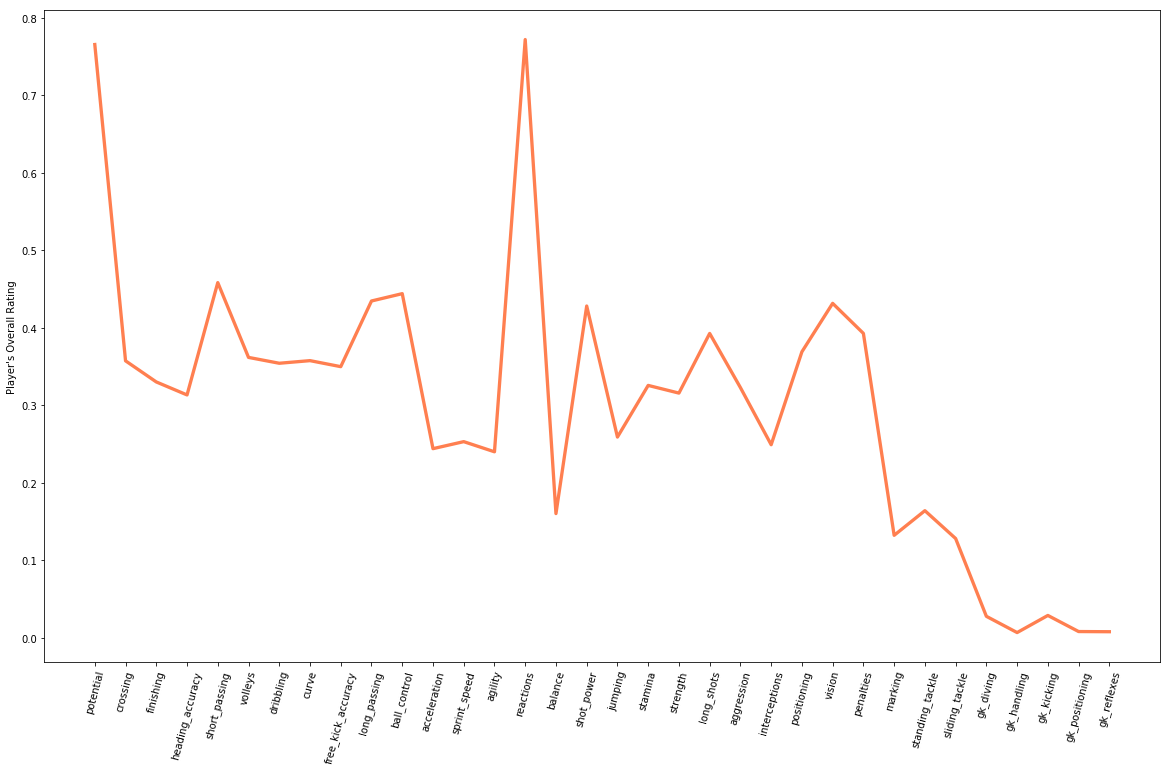

In [51]:
# let's plot above dataframe using the function we created
    
plot_dataframe(df2, 'Player\'s Overall Rating')

In [52]:
# Define the features you want to use for grouping players

select5features = ['gk_kicking', 'potential', 'marking', 'interceptions', 'standing_tackle']
select5features

['gk_kicking', 'potential', 'marking', 'interceptions', 'standing_tackle']

In [53]:
# Generate a new dataframe by selecting the features you just defined

df_select = df[select5features].copy(deep=True)

In [54]:
df_select.head()# Perform scaling on the dataframe containing the features

data = scale(df_select)

# Define number of clusters
noOfClusters = 4

# Train a model
model = KMeans(init='k-means++', n_clusters=noOfClusters, n_init=20).fit(data)

In [55]:
print(90*'_')
print("\nCount of players in each cluster")
print(90*'_')

pd.value_counts(model.labels_, sort=False)

__________________________________________________________________________________________

Count of players in each cluster
__________________________________________________________________________________________


0    49987
1    55853
2    50729
3    23785
dtype: int64

In [56]:
def pd_centers(featuresUsed, centers):
    from itertools import cycle, islice
    from pandas.tools.plotting import parallel_coordinates
    import matplotlib.pyplot as plt
    import pandas as pd
    import numpy as np
    
    colNames = list(featuresUsed)
    colNames.append('prediction')
    # Zip with a column called 'prediction' (index)
    Z = [np.append(A, index) for index, A in enumerate(centers)]
    
    # Convert to pandas for plotting
    P = pd.DataFrame(Z, columns=colNames)
    P['prediction'] = P['prediction'].astype(int)
    return P

def parallel_plot(data):
    from itertools import cycle, islice
    from pandas.tools.plotting import parallel_coordinates
    import matplotlib.pyplot as plt
    
    my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(data)))
    plt.figure(figsize=(15,8)).gca().axes.set_ylim([-2.5,+2.5])
    parallel_coordinates(data, 'prediction', color = my_colors, marker='o')

In [57]:
# Create a composite dataframe for plotting
# ... Use custom function declared in customplot.py (which we imported at the beginning of this notebook)

P = pd_centers(featuresUsed=select5features, centers=model.cluster_centers_)
P

,gk_kicking,potential,marking,interceptions,standing_tackle,prediction
0,-0.336269,-0.849696,0.545528,0.403862,0.547919,0
1,-0.477141,0.107076,-0.948228,-0.975707,-0.914695,1
2,-0.044258,0.699095,1.026460,0.981087,1.029047,2
3,1.920610,0.038927,-1.111091,-0.652310,-1.200366,3


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: FutureWarning: 'pandas.tools.plotting.parallel_coordinates' is deprecated, import 'pandas.plotting.parallel_coordinates' instead.


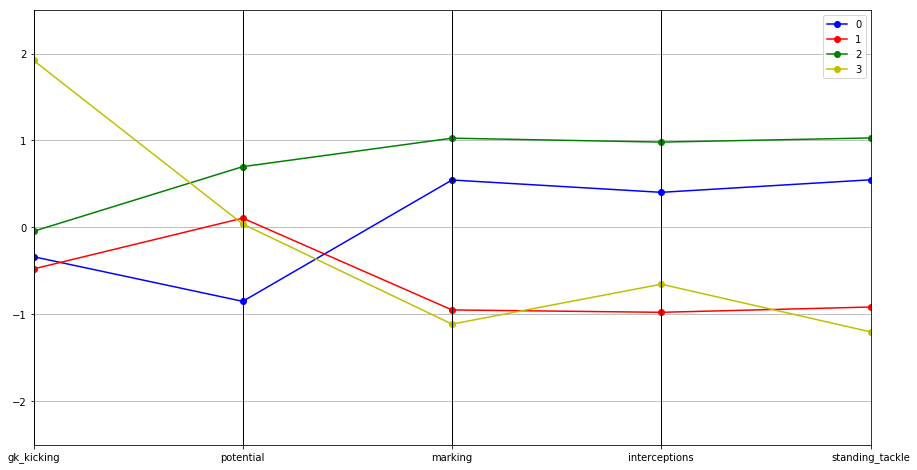

In [58]:
# For plotting the graph inside the notebook itself, we use the following command

%matplotlib inline
parallel_plot(P)

# REGRESSION ANALYSIS



In [59]:
import sqlite3
import pandas as pd 
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

In [61]:
# Create your connection.
cnx = sqlite3.connect('C:/Users/karaj/Downloads/soccer/database.sqlite')
df = pd.read_sql_query("SELECT * FROM Player_Attributes", cnx)

In [65]:
#df.head()
#df.shape
df.columns

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

In [66]:
features = [
       'potential', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes']

In [67]:
target = ['overall_rating']

In [68]:
df = df.dropna()

In [69]:
X = df[features]

In [70]:
y = df[target]

In [76]:
X.iloc[2]

potential             66.0
crossing              49.0
finishing             44.0
heading_accuracy      71.0
short_passing         61.0
volleys               44.0
dribbling             51.0
curve                 45.0
free_kick_accuracy    39.0
long_passing          64.0
ball_control          49.0
acceleration          60.0
sprint_speed          64.0
agility               59.0
reactions             47.0
balance               65.0
shot_power            55.0
jumping               58.0
stamina               54.0
strength              76.0
long_shots            35.0
aggression            63.0
interceptions         41.0
positioning           45.0
vision                54.0
penalties             48.0
marking               65.0
standing_tackle       66.0
sliding_tackle        69.0
gk_diving              6.0
gk_handling           11.0
gk_kicking            10.0
gk_positioning         8.0
gk_reflexes            8.0
Name: 2, dtype: float64

In [77]:
y

,overall_rating
0,67.0
1,67.0
2,62.0
3,61.0
4,61.0
5,74.0
6,74.0
7,73.0
8,73.0
9,73.0


In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=324)

In [79]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [80]:
y_prediction = regressor.predict(X_test)
y_prediction

array([[66.51284879],
       [79.77234615],
       [66.57371825],
       ...,
       [69.23780133],
       [64.58351696],
       [73.6881185 ]])

In [81]:
y_test.describe()

,overall_rating
count,59517.000000
mean,68.635818
std,7.041297
min,33.000000
25%,64.000000
50%,69.000000
75%,73.000000
max,94.000000


In [82]:
RMSE = sqrt(mean_squared_error(y_true = y_test, y_pred = y_prediction))

In [83]:
print(RMSE)

2.805303046855209


In [84]:
regressor = DecisionTreeRegressor(max_depth=20)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=20, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [85]:
y_prediction = regressor.predict(X_test)
y_prediction

array([62.        , 84.        , 62.38666667, ..., 71.        ,
       62.        , 72.        ])

In [86]:
y_test.describe()

,overall_rating
count,59517.000000
mean,68.635818
std,7.041297
min,33.000000
25%,64.000000
50%,69.000000
75%,73.000000
max,94.000000


In [87]:
RMSE = sqrt(mean_squared_error(y_true = y_test, y_pred = y_prediction))

In [88]:
print(RMSE)

1.4447120151864234
